# SOMMAIRE:
* [Importations](#import)
* [Observation de notre dataset](#obs)
* [Modification du dataset](#modif)
* [Gestion des null](#null)
* [Les outliers](#out)
* [Scaling](#scale)
* [Iterations](#final)

## Importations <a class="anchor" id="import"></a>

In [2]:
# Import librairie Pandas

import pandas as pd

In [3]:
# Import librairie Seaborn

import seaborn as sns

In [4]:
# Import librairie Matplotlib

import matplotlib.pyplot as plt

In [5]:
# Import librairie Numpy

import numpy as np

In [6]:
# Import librairie sklearn

from sklearn.preprocessing import MinMaxScaler

In [7]:
# Import dataset immobilier : train_data

df_immobilier  = pd.read_csv("train_data.csv")
df_immobilier.head(10)

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
5,8781,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,315100.0,<1H OCEAN
6,5438,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,500001.0,<1H OCEAN
7,14856,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,172800.0,NEAR OCEAN
8,19956,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,108100.0,INLAND
9,17175,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,334600.0,NEAR OCEAN


## Observation de notre dataset <a class="anchor" id="obs"></a>

In [7]:
# Je veux voir les dimensions de mon dataset

df_immobilier.shape

(16512, 11)

In [8]:
# J'observe les features du dataset et leurs types
# On devrait changer en int le type des colonnes :
# median_age, housing_median_age, total_rooms, total_bedrooms

df_immobilier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


On prend en compte les explications detaillées des features

- longitude
- latitude
- housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
- totalRooms: Nombre total de chambres dans un bloc
- totalBedrooms: Nombre total de chambres dans un bloc
- population: Nombre total de personnes résidant dans un bloc
- households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
- medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
- medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
- oceanProximity: Situation de la maison par rapport à la mer

In [8]:
# Informations sur les quartiles, la moyenne, ecarts type, les valeurs minimale et maximum

df_immobilier.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# On observe si des Nan values son presentes dans notre dataset
# Ici, 176 Nan values pour la colonne "total_bedrooms"

nan_value = df_immobilier.isnull().sum()
nan_value

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Je veux connaitre les valeurs pour la colonne "ocean_proximity " et leurs nombres
# On peut voir ici 5 type de proximity par rapport à l'ocean dans un type exceptionnel (ISLAND) avec seulement 4 valeurs correspondantes

type_proximity = df_immobilier["ocean_proximity"].value_counts()
type_proximity

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

KeyboardInterrupt: 

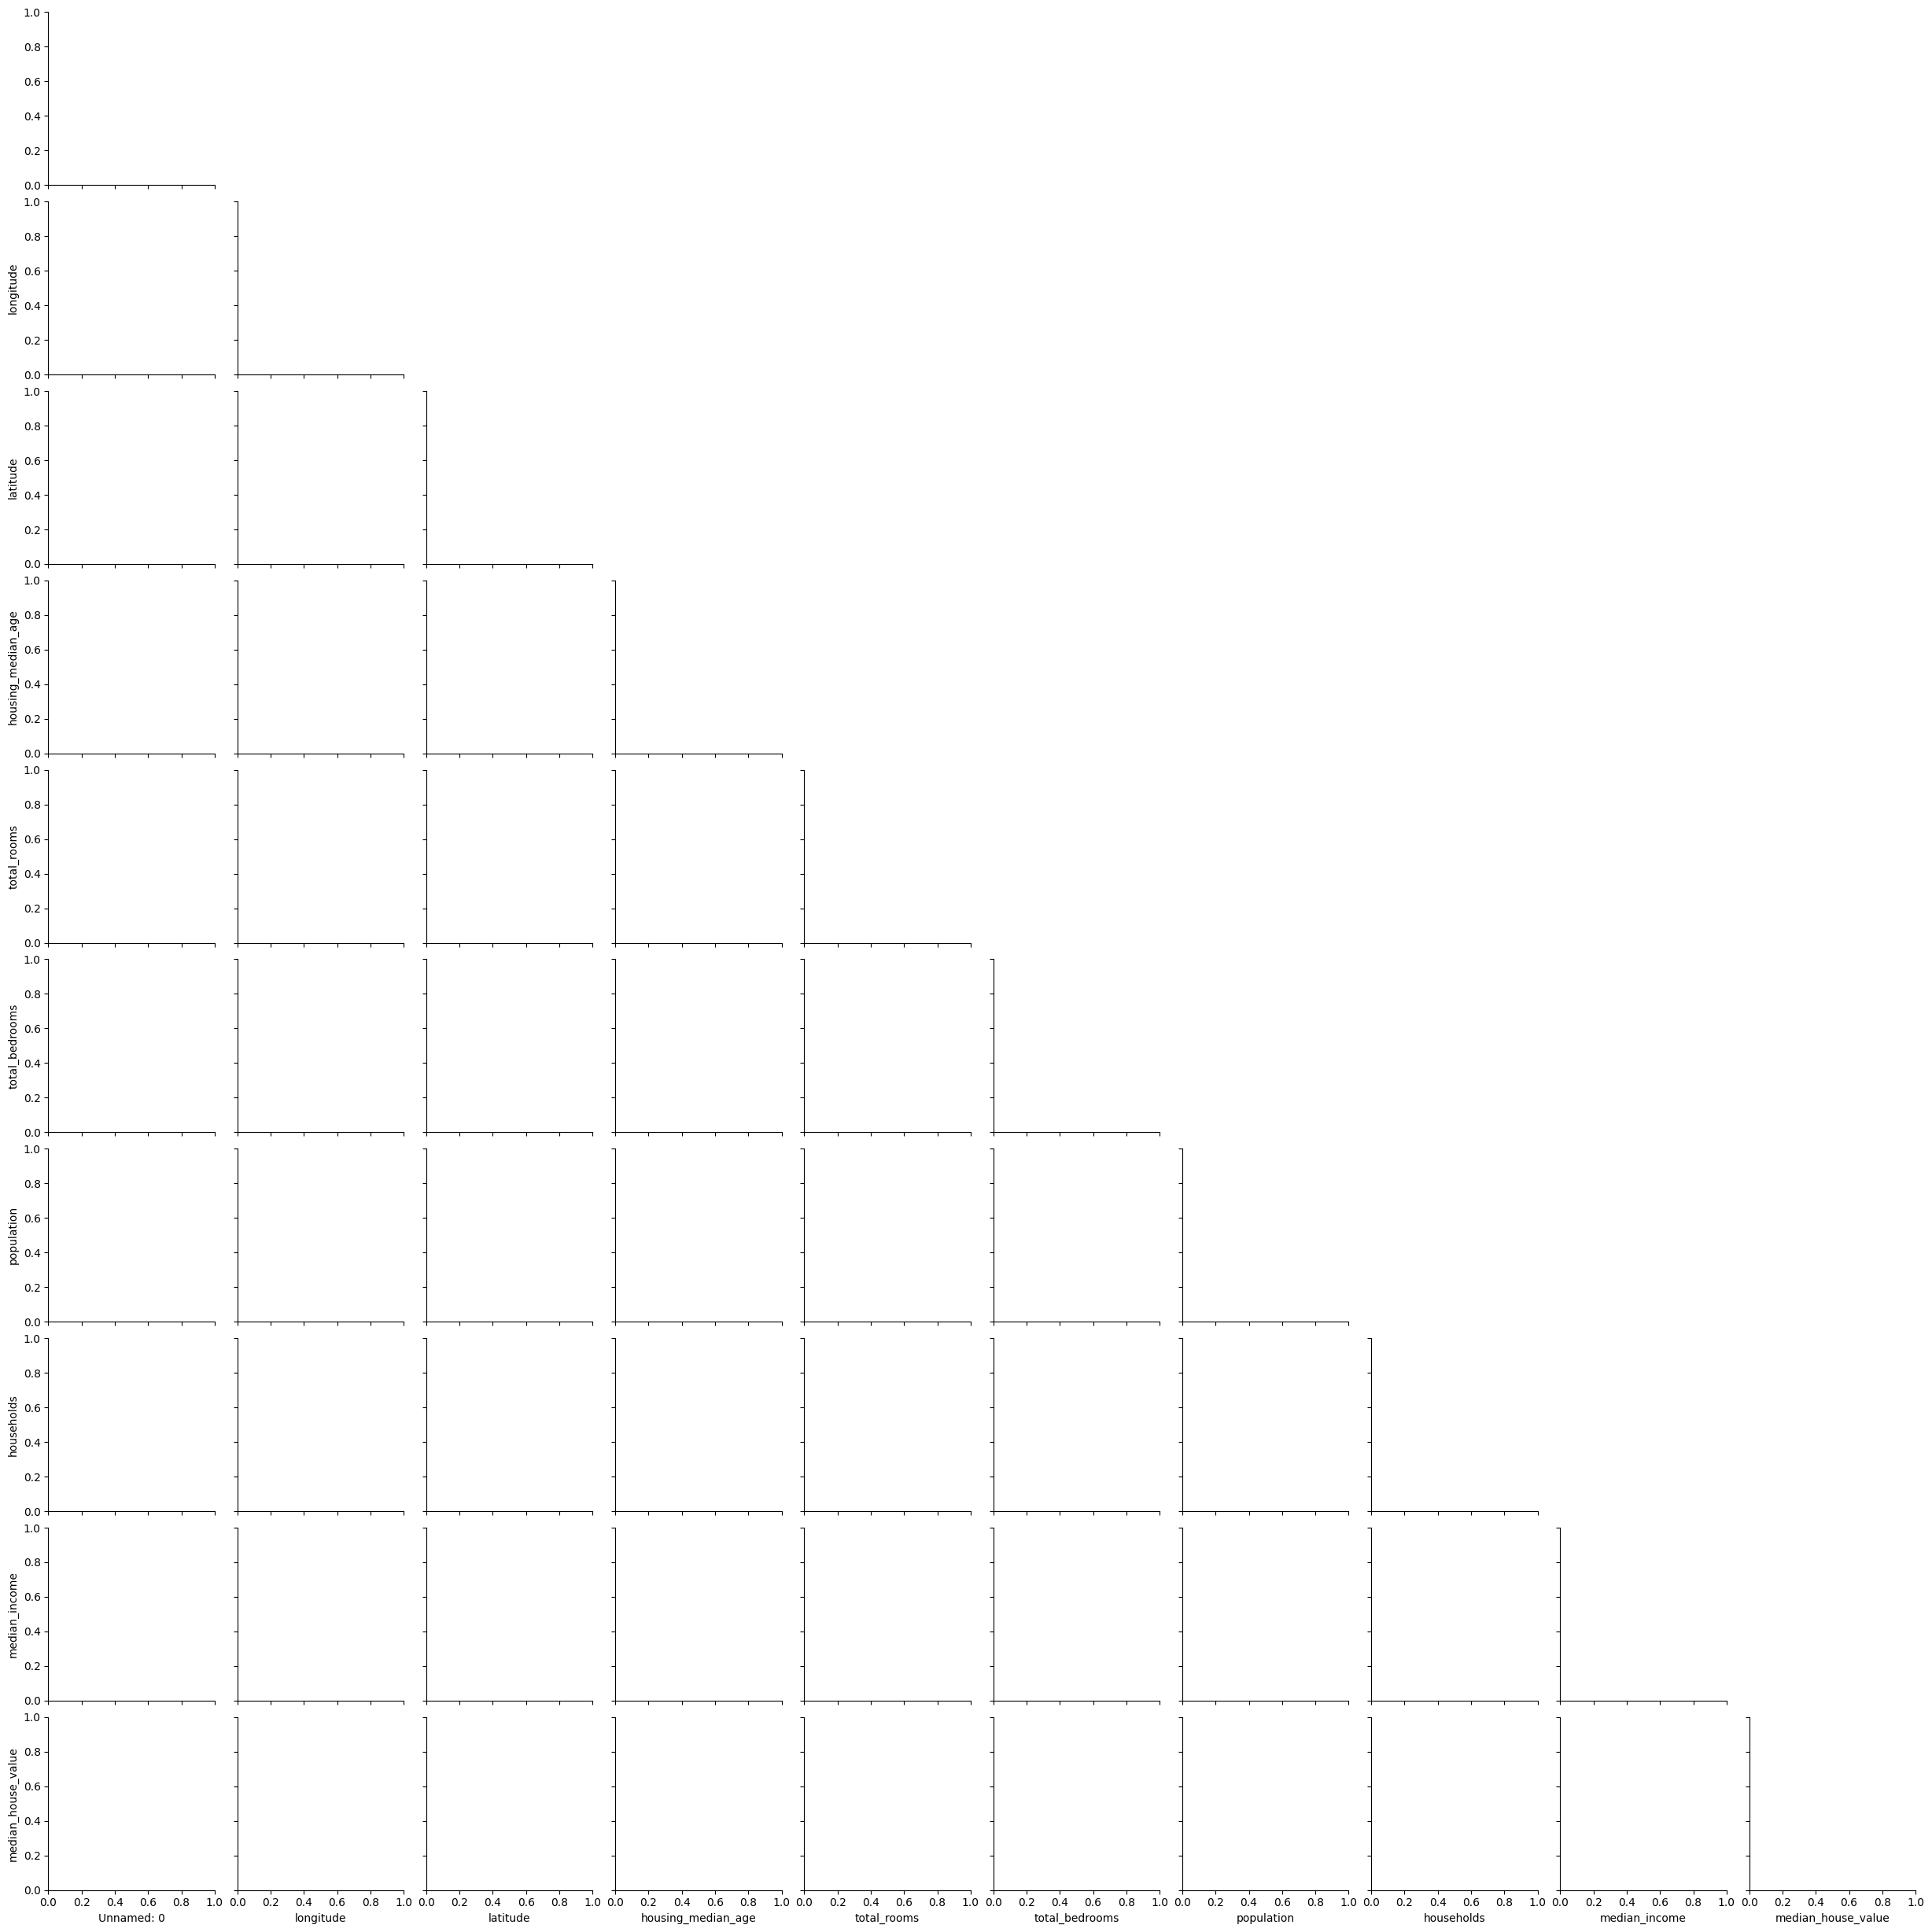

In [12]:
# Graphique pour avoir une vue d'ensemble de notre dataset
# On observe 3 droites pour la feature total rooms en lien avec households, population,total_bedrooms.
# On observe 2 droites pour la total bedrooms en lien avec population et households
# On observe 1 droite pour population avec household

graph1 = sns.PairGrid(data = df_immobilier,corner = True)
graph1.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
graph1.map_lower(sns.scatterplot, marker = "+")
graph1.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
graph1.add_legend(frameon=True)
graph1.legend.set_bbox_to_anchor((.61,.6))

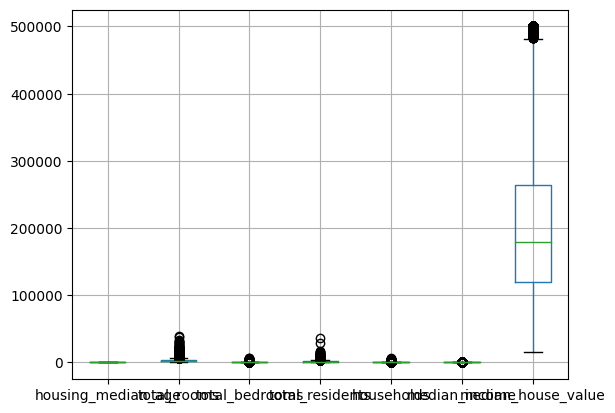

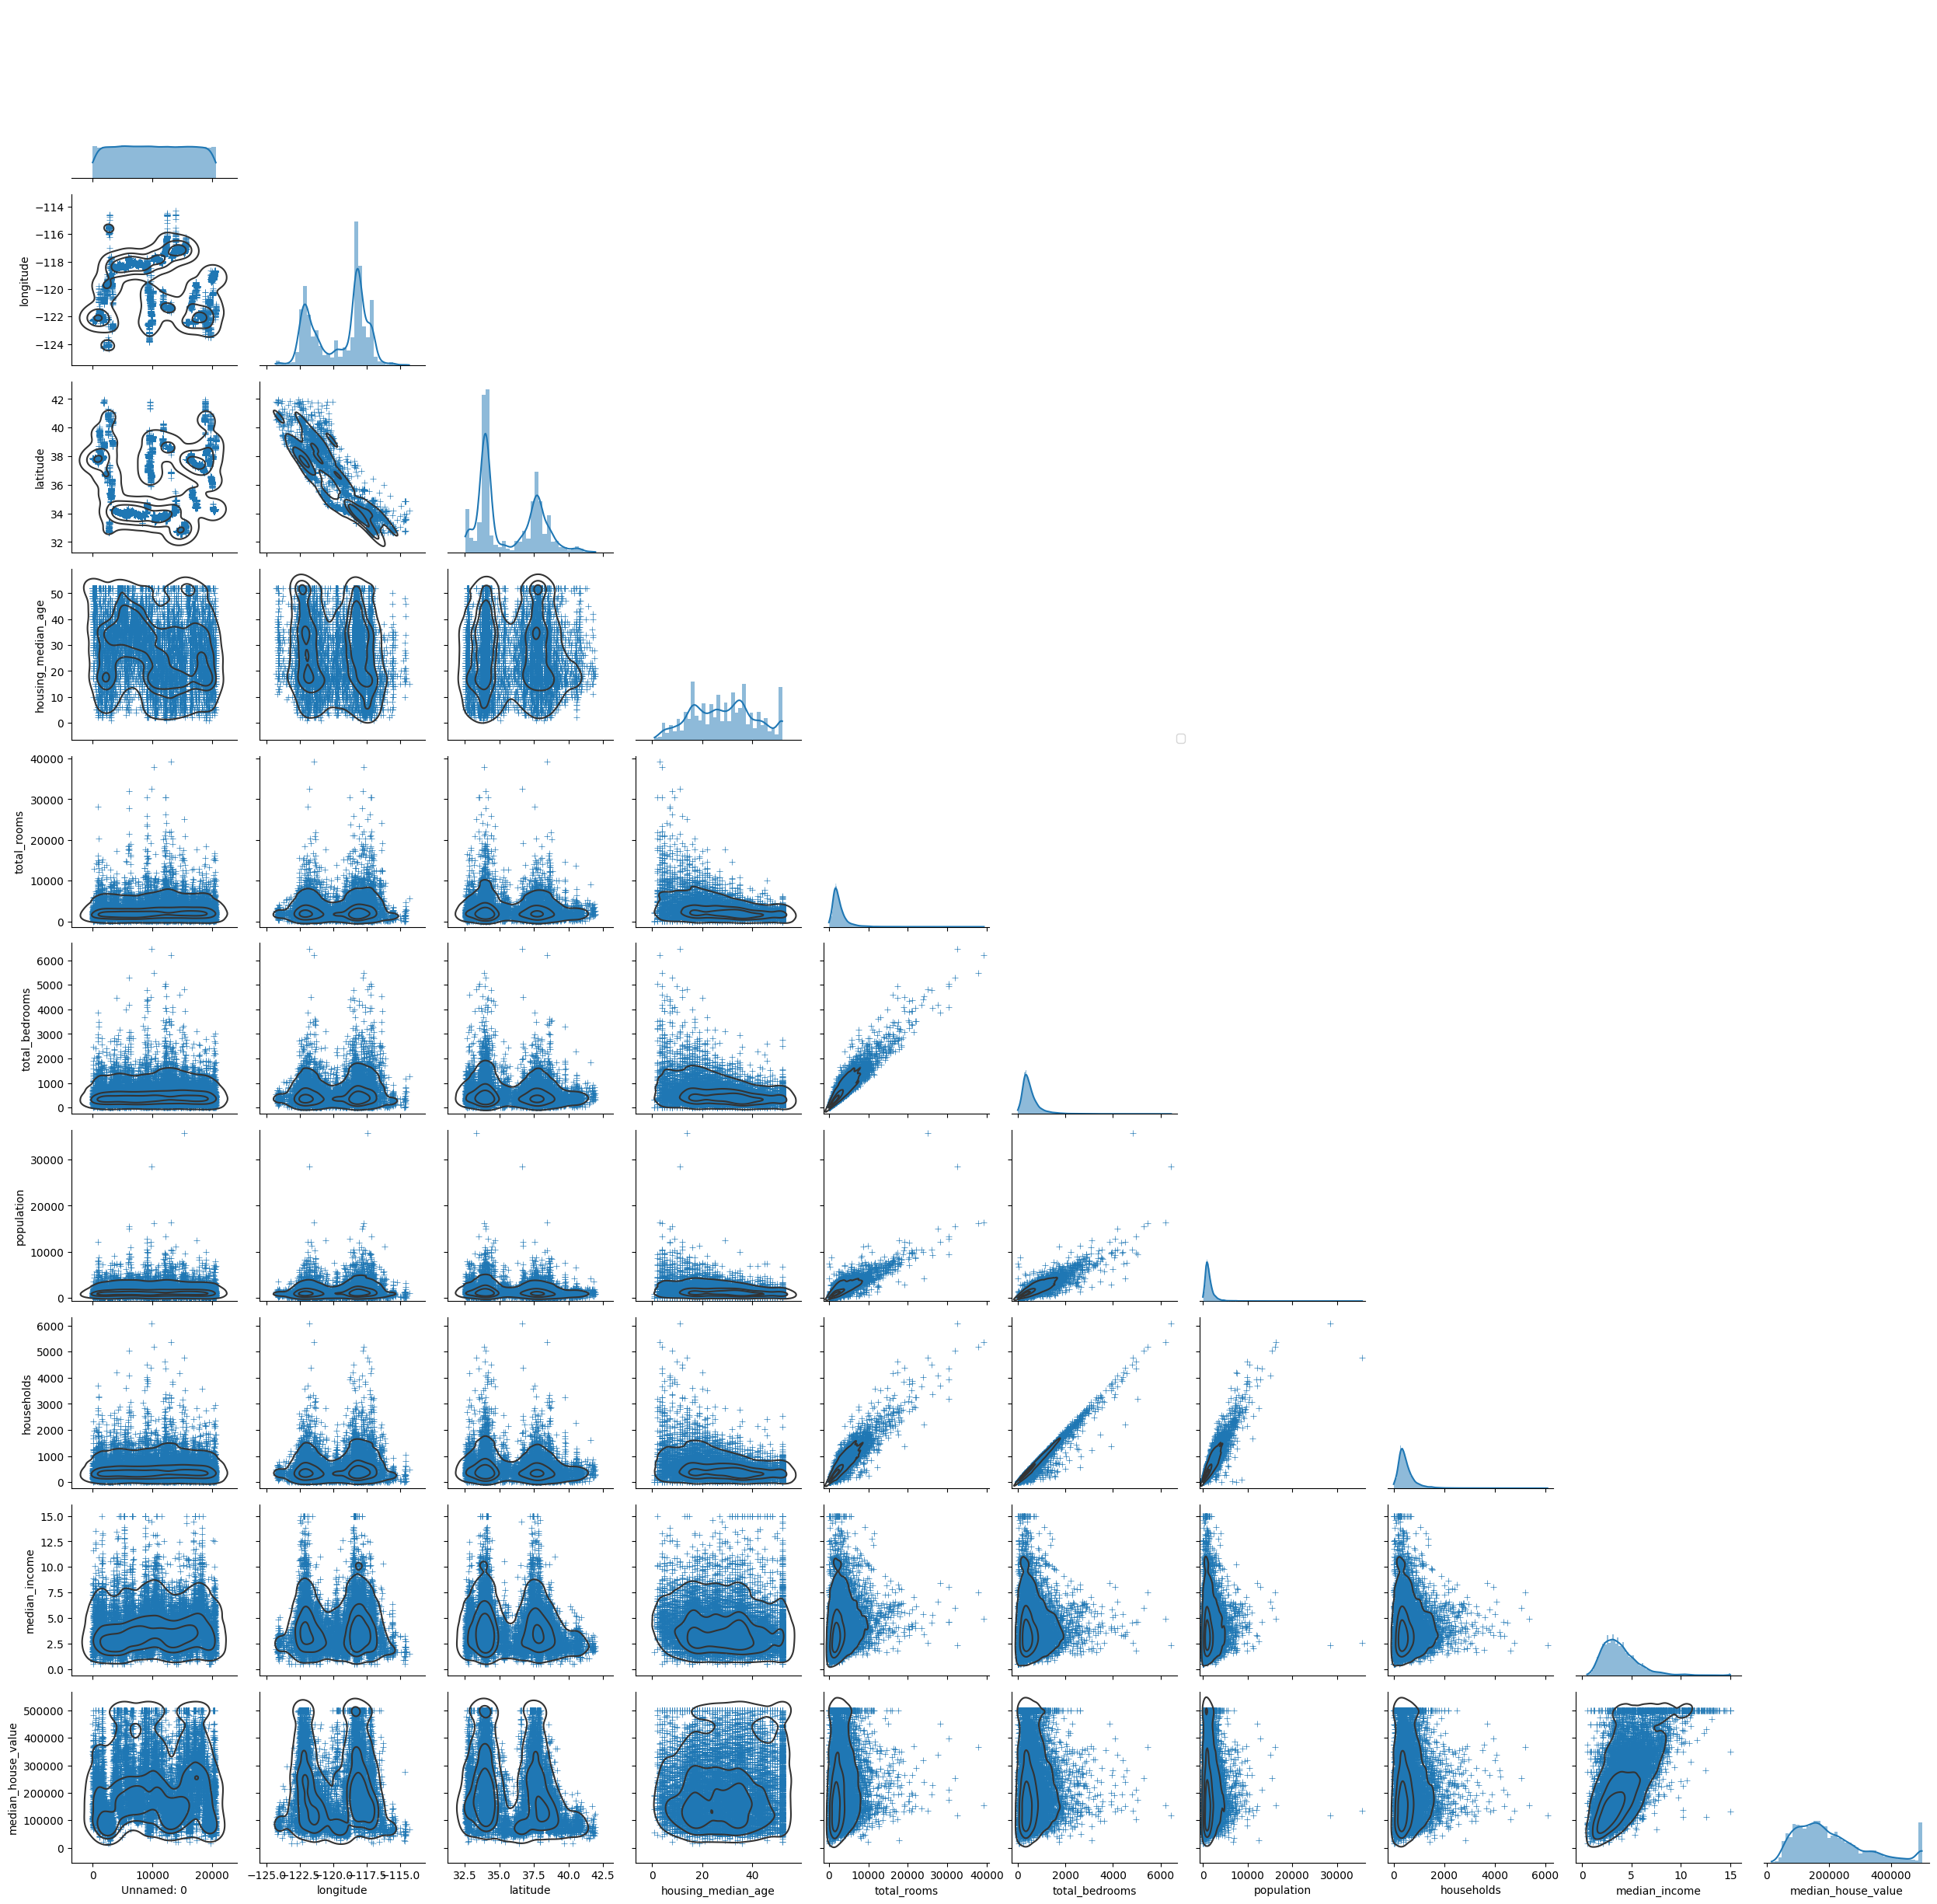

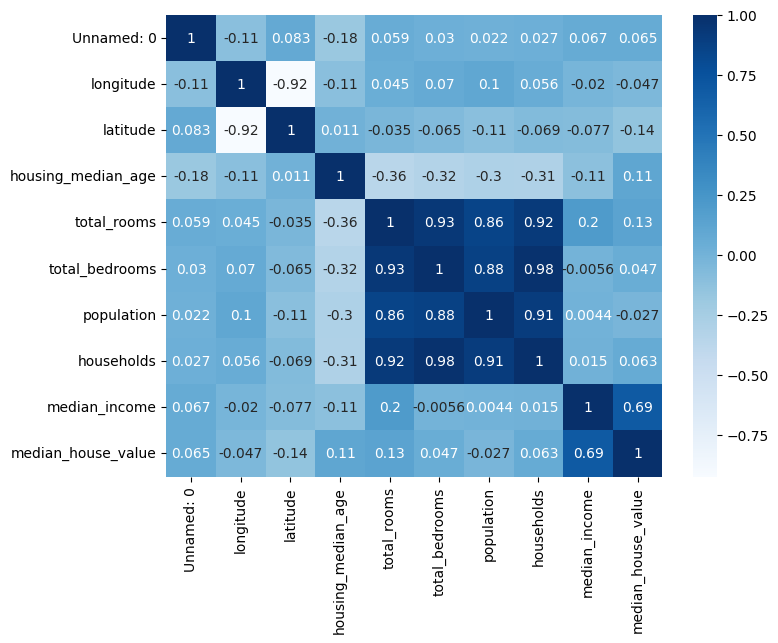

In [63]:
# Graphique de correlation pour notre dataset
# Comme sur le graphique precedent, on observe une forte correlation positive au centre liés au même features
# De plus les features median_income et median_house_value sont egalement correlées positivement

corr_df = df_immobilier.corr(method='pearson')
#plt.matshow(corr_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap=plt.cm.Blues)
plt.show()

In [64]:
# ON POURRAIS REMPLACER LES TYPE DE VALEURS DE LA COLONNE OCEAN_PROXIMITY PAR DES CHIFFRES POUR OBSERVER LEURS CORRELATION
# fonction lambda ?
# fonction replace ?

In [9]:
#On observe notre dataset

df_immobilier

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


## Modification du dataset <a class="anchor" id="modif"></a>

In [66]:
# rename, drop, new_column

In [10]:
# Renomme colonne population pour une meilleure comprehension

df_immobilier.rename(columns = {'population':'total_residents'}, inplace = True)
df_immobilier

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [11]:
# Regroupement par rapport a l'ancienetée d'une maison et sa valeur median

house_age_price = df_immobilier.groupby(['housing_median_age', 'median_house_value'])
house_age_price.first()

Unnamed: 0  longitude  latitude  \
housing_median_age median_house_value                                    
1.0                55000.0                  12286    -116.95     33.86   
                   141700.0                  3130    -117.95     35.08   
                   189200.0                 19536    -120.93     37.65   
                   191300.0                 18972    -122.00     38.23   
2.0                47500.0                   2774    -115.80     33.26   
...                                           ...        ...       ...   
52.0               494400.0                 15720    -122.45     37.78   
                   494700.0                  5325    -118.43     34.04   
                   498400.0                  5753    -118.27     34.18   
                   500000.0                 15677    -122.43     37.80   
                   500001.0                 16136    -122.49     37.79   

                                       total_rooms  total_bedrooms  \
housing_median_age median_house_value                                
1.0                55000.0                     6.0             2.0   
                   141700.0                   83.0            15.0   
                   189200.0                 2254.0           328.0   
                   191300.0                 2062.0           343.0   
2.0                47500.0                    96.0            18.0   
...                                            ...             ...   
52.0               494400.0                 1345.0           291.0   
                   494700.0                 2425.0           435.0   
                   498400.0                 3034.0           406.0   
                   500000.0                 2994.0           821.0   
                   500001.0                 3146.0           478.0   

                                       total_residents  households  \
housing_median_age median_house_value                                
1.0                55000.0                         8.0         2.0   
                   141700.0                       32.0        15.0   
                   189200.0                      402.0       112.0   
                   191300.0                      872.0       268.0   
2.0                47500.0                        30.0        16.0   
...                                                ...         ...   
52.0               494400.0                      560.0       294.0   
                   494700.0                      962.0       412.0   
                   498400.0                     1158.0       399.0   
                   500000.0                     1240.0       779.0   
                   500001.0                     1143.0       455.0   

                                       median_income ocean_proximity  
housing_median_age median_house_value                                 
1.0                55000.0                    1.6250          INLAND  
                   141700.0                   4.8750          INLAND  
                   189200.0                   4.2500          INLAND  
                   191300.0                   5.2636          INLAND  
2.0                47500.0                    5.3374          INLAND  
...                                              ...             ...  
52.0               494400.0                   3.7159        NEAR BAY  
                   494700.0                   5.8587       <1H OCEAN  
                   498400.0                   6.2976       <1H OCEAN  
                   500000.0                   3.3715        NEAR BAY  
                   500001.0                   6.1407        NEAR BAY  

[14337 rows x 9 columns]

In [12]:
# dataframe des valeurs numeriques uniquement

num_value = df_immobilier[['housing_median_age','median_house_value','total_rooms','total_bedrooms','total_residents','households','median_income']]
num_value

,housing_median_age,median_house_value,total_rooms,total_bedrooms,total_residents,households,median_income
0,6.0,72000.0,1853.0,473.0,1397.0,417.0,1.4817
1,8.0,274100.0,2032.0,349.0,862.0,340.0,6.9133
2,25.0,58300.0,875.0,214.0,931.0,214.0,1.5536
3,31.0,200000.0,622.0,229.0,597.0,227.0,1.5284
4,21.0,117900.0,1922.0,373.0,1130.0,372.0,4.0815
...,...,...,...,...,...,...,...
16507,20.0,93800.0,1465.0,278.0,745.0,250.0,3.0625
16508,49.0,103100.0,2365.0,504.0,1131.0,458.0,2.6133
16509,19.0,192600.0,2531.0,461.0,1206.0,429.0,4.4958
16510,39.0,153500.0,2776.0,840.0,2546.0,773.0,2.5750


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

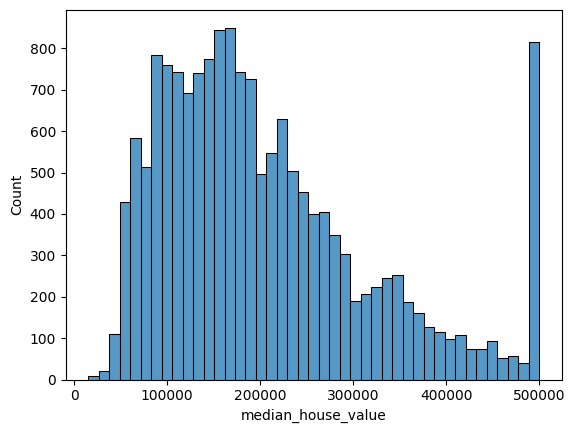

In [13]:
# graph3 sur median_value

sns.histplot(data=df_immobilier, x="median_house_value")

In [14]:
# Enlever les colonnes : unnamed: 0, latitude et longitude

df_immobilier_v2 = df_immobilier.drop(columns=["Unnamed: 0","latitude", "longitude"])
df_immobilier_v2

,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...
16507,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


## Gestion des null <a class="anchor" id="null"></a>

In [15]:
# Observation des valeurs null en ligne, pour avoir plus de details et potentiellement trouver un lien

# Si il y a des Nan dans cette colonne, peut etre est ce car ce sont des bureaux ? Ecoles ou autres institutions ?
# Ou alors que l'information n'a pas été transmise ?

df_immobilier[df_immobilier.isnull().any(axis=1)]

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
33,5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN
171,2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
178,10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND
179,19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND
259,19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16002,17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN
16089,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN
16214,4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
16228,9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY


In [16]:
# Methode 1 : On va remplacer nos valeurs null par la moyenne car elles influencerai nos calculs

df_immobilier_null_mean = df_immobilier['total_bedrooms'].fillna((df_immobilier['total_bedrooms'].mean()), inplace=True)

In [17]:
# Methode 2 : On va remplacer nos valeurs null par la median car elles influencerai nos calculs


df_immobilier_null_median = df_immobilier['total_bedrooms'].fillna((df_immobilier['total_bedrooms'].median()), inplace=True)

In [18]:
# Methode 3 : On va supprimer nos valeurs null car elles influencerai nos calculs

df_immobilier_no_null = df_immobilier.dropna(subset=['total_bedrooms'])

## Les outliers <a class="anchor" id="out"></a>

In [19]:
# Methode de l'IQR pour trouver les outliers

# calcul du 1er et 3eme quartiles
Q1 = df_immobilier.quantile(0.25)
Q3 = df_immobilier.quantile(0.75)

# calcul de l'inter quartile (IQR)
IQR = Q3 - Q1

# Identification des outliers
df_no_outliers = df_immobilier[~((df_immobilier < (Q1 - 1.5 * IQR)) | (df_immobilier > (Q3 + 1.5 * IQR))).any(axis=1)]

# afficher outliers
df_no_outliers

/tmp/ipykernel_29182/619421994.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df_immobilier[~((df_immobilier < (Q1 - 1.5 * IQR)) | (df_immobilier > (Q3 + 1.5 * IQR))).any(axis=1)]


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


<AxesSubplot:>

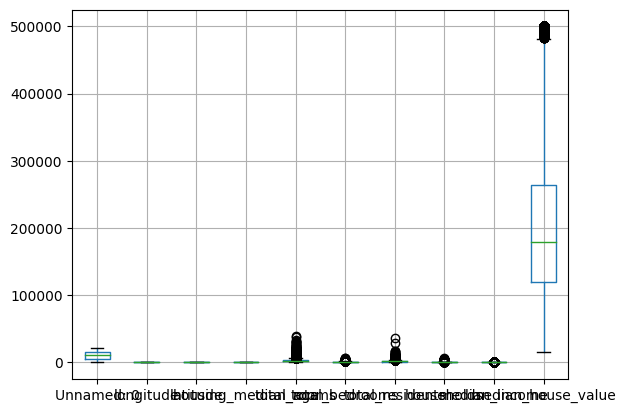

In [20]:
# Methode des boxplot
# Visualisation global des outliers
# Ce graph n'ai pas tres lisible, on va plutot regarder de façon detaillées par colonne

df_immobilier.boxplot()

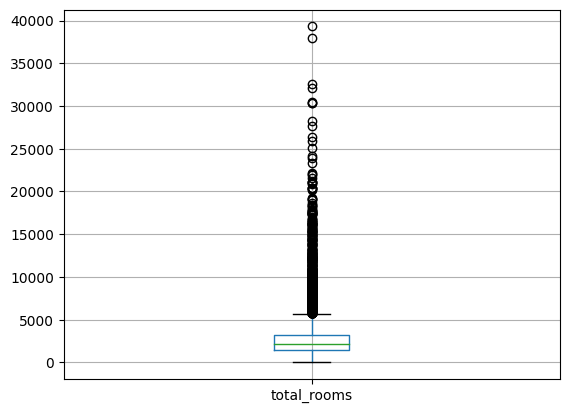

In [21]:
# Boxplot de la colonne "total_rooms"
df_immobilier.boxplot(column='total_rooms')

# Afficher le plot
plt.show()

In [22]:
# Definition des outliers visuellement
outliers_total_rooms = df_immobilier.loc[df_immobilier.total_rooms > 30000, 'total_rooms']
outliers_total_rooms

4185     39320.0
8684     30401.0
13049    30450.0
13152    32054.0
13564    30405.0
13922    37937.0
14503    32627.0
Name: total_rooms, dtype: float64

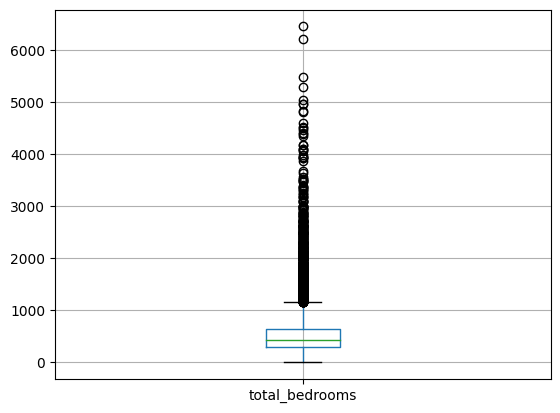

In [23]:
# Boxplot de la colonne "total_bedrooms"
df_immobilier.boxplot(column='total_bedrooms')

# Afficher le plot
plt.show()

In [24]:
# Definition des outliers visuellement
outliers_bedrooms = df_immobilier.loc[df_immobilier.total_bedrooms > 5000, 'total_bedrooms']
outliers_bedrooms

4185     6210.0
13049    5033.0
13152    5290.0
13922    5471.0
14503    6445.0
Name: total_bedrooms, dtype: float64

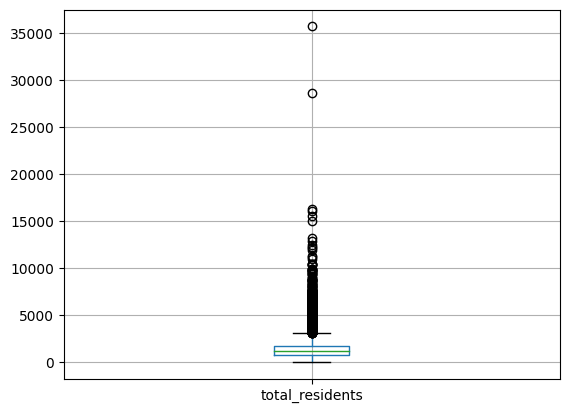

In [25]:
# Boxplot de la colonne "total_residents"
df_immobilier.boxplot(column='total_residents')

# Afficher le plot
plt.show()

In [26]:
# Definition des outliers visuellement
outliers_residents = df_immobilier.loc[df_immobilier.total_residents > 20000, 'total_residents']
outliers_residents

7471     35682.0
14503    28566.0
Name: total_residents, dtype: float64

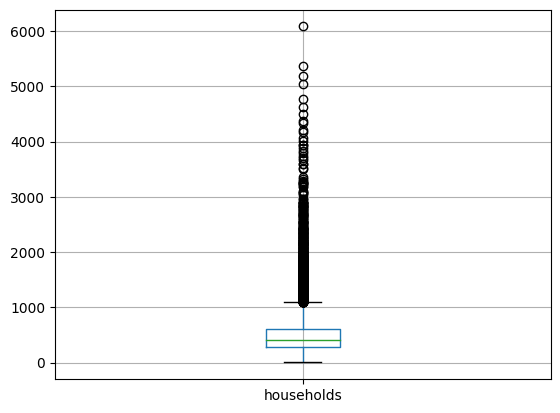

In [27]:
# Boxplot de la colonne "households"
df_immobilier.boxplot(column='households')

# Afficher le plot
plt.show()

In [35]:
# Definition des outliers visuellement
outliers_households = df_immobilier.loc[df_immobilier.households > 5000, 'households']
outliers_households

4185     5358.0
13152    5050.0
13922    5189.0
14503    6082.0
Name: households, dtype: float64

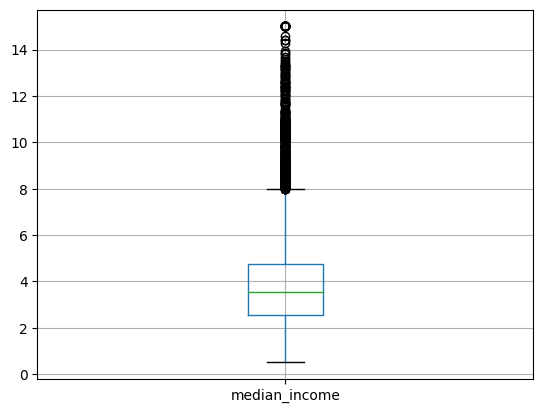

In [36]:
# Boxplot de la colonne "median_income"
df_immobilier.boxplot(column='median_income')

# Afficher le plot
plt.show()

In [37]:
# Definition des outliers visuellement
outliers_median_income = df_immobilier.loc[df_immobilier.median_income > 15, 'median_income']
outliers_median_income

467      15.0001
688      15.0001
1108     15.0001
1111     15.0001
1238     15.0001
1249     15.0001
1477     15.0001
1682     15.0001
2240     15.0001
2252     15.0001
2382     15.0001
2403     15.0001
2725     15.0001
3380     15.0001
5030     15.0001
5128     15.0001
6221     15.0001
6248     15.0001
6453     15.0001
6476     15.0001
6599     15.0001
6733     15.0001
6991     15.0001
7139     15.0001
7675     15.0001
8465     15.0001
8933     15.0001
10848    15.0001
12358    15.0001
13198    15.0001
13563    15.0001
13631    15.0001
13690    15.0001
13780    15.0001
13846    15.0001
15449    15.0001
16153    15.0001
16291    15.0001
Name: median_income, dtype: float64

/home/cguldene/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cguldene/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cguldene/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an exp

IndexError: index 10 is out of bounds for axis 0 with size 10

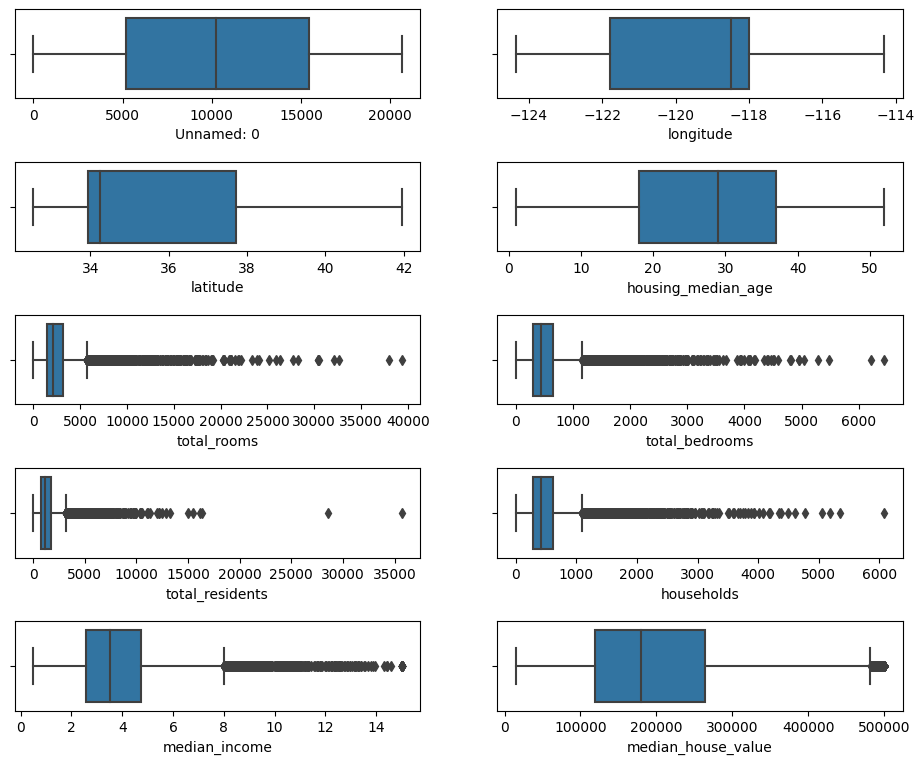

In [24]:
# Methode des boxplot
# Visualisation global des outliers de façon plus lisible
# Ici on affiche 5 boxplot pour 2 colonnes

fig, axs = plt.subplots(5, 2, figsize=(10,8))
axs = axs.flatten()

# tight_layout pour espacement
fig.tight_layout(pad=2.5)
for i, col in enumerate(df_immobilier.columns):
    sns.boxplot(df_immobilier[col], ax=axs[i])

In [38]:
# Afficher nos outliers commun
# On observe que ce sont toutes des residences proche de l'ocean voir pour une, une ile.
# Nous aurions pu regarder avec la latitude et longitude l'emplacement exact pour voir si cela correspond à des endroits cotés voir un meme endroit.

filtered_outliers = df_immobilier.loc[[4185,7471,13152,13922,14503]]
filtered_outliers

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
4185,13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND
7471,15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN
13152,6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
13922,10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
14503,9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN


In [28]:
# Afficher les mediane de chaque colonnes afin de d'observer la colonne que l'on va imputer au outliers

df_immobilier.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,422.935369,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,297.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,438.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,644.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [29]:
# Afficher les mediane de chaque outliers afin de d'observer la colonne que l'on va imputer au outliers
# On observe que la valeurs moyenne et median des colonne "total_rooms", "total_residents" et "total_bedrooms",
# sont differentes par rapport à l'ensemble des données du dataset

df_immobilier.loc[[4185,7471,13152,13922,14503]].describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,10949.000000,-119.234000,35.268000,8.000000,33414.600000,5647.000000,22436.400000,5289.600000,4.669400,205420.000000
std,3526.224823,2.181532,2.178926,4.636809,5620.257405,670.406966,9199.187643,492.729439,2.227772,104228.724448
min,6057.000000,-121.790000,33.350000,3.000000,25135.000000,4819.000000,15507.000000,4769.000000,2.308700,118800.000000
25%,9880.000000,-121.440000,33.890000,4.000000,32054.000000,5290.000000,16122.000000,5050.000000,2.572900,134400.000000
50%,10309.000000,-117.780000,34.030000,8.000000,32627.000000,5471.000000,16305.000000,5189.000000,4.951600,153700.000000
75%,13139.000000,-117.740000,36.640000,11.000000,37937.000000,6210.000000,28566.000000,5358.000000,6.019100,253900.000000
max,15360.000000,-117.420000,38.430000,14.000000,39320.000000,6445.000000,35682.000000,6082.000000,7.494700,366300.000000


In [30]:
# Version 2 : On cree un dataframe sans ces outliers on pourrait sinon les remplacer par nos données moyenne

#df_immobilier_v2 = df_immobilier.loc([4185,7471,13152,13922,14503]).mean()
#df_immobilier_v2

In [31]:
# Version 3 : On cree un dataframe en remplacent les outliers par nos données medianes


df_immobilier_v3 = df_immobilier.loc[[4185,7471,13152,13922,14503]].median()
df_immobilier_v3

# test
#df = df[truc].replace({10 : df[truc].median() })

/tmp/ipykernel_29182/292227742.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_immobilier_v3 = df_immobilier.loc[[4185,7471,13152,13922,14503]].median()


Unnamed: 0             10309.0000
longitude               -117.7800
latitude                  34.0300
housing_median_age         8.0000
total_rooms            32627.0000
total_bedrooms          5471.0000
total_residents        16305.0000
households              5189.0000
median_income              4.9516
median_house_value    153700.0000
dtype: float64

In [32]:
# Code de verification changement des valeurs des outliers

check_df_immo_v3 = df_immobilier.loc[[4185,7471,13152,13922,14503]]
check_df_immo_v3

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_residents,households,median_income,median_house_value,ocean_proximity
4185,13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND
7471,15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN
13152,6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
13922,10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
14503,9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN


## Scaling <a class="anchor" id="scale"></a>

In [ ]:
# Method 1: by separately calculate the values required as given in the formula of Min-Max Normalization 
# and then apply it to the dataset

# Min-Max Normalization
#df_norm = (df_immobilier_v2-df_immobilier_v2.min())/(df_immobilier_v2.max()-df_immobilier_v2.min())
#df_norm = pd.concat((df_norm, data.species), 1)
 
#print("Scaled Dataset Using Pandas")
#df_norm.head()

In [76]:
# Method 2: Using MinMaxScaler from sklearn 

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df_immobilier_v2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

ValueError: could not convert string to float: 'INLAND'

## Iterations <a class="anchor" id="final"></a>

In [ ]:
# Export de df_immobilier de base

df_immobilier.to_csv('df_immo_base.csv')

In [ ]:
# Export de num_value (seulement valeurs numeriques)

num_value.to_csv('num_value.csv')

In [33]:
# Export de df_immobilier version 2 (avec outliers supprimés)

df_no_outliers.to_csv('df_no_outliers.csv')

NameError: name 'df_no_outliers' is not defined

In [ ]:
# Export de df_immobilier de base

df_immobilier_null_median.to_csv('df_immobilier_null_median.csv')